In [1]:
import os
import json

import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science', 'grid'])
mpl.rcParams["font.size"] = "16"

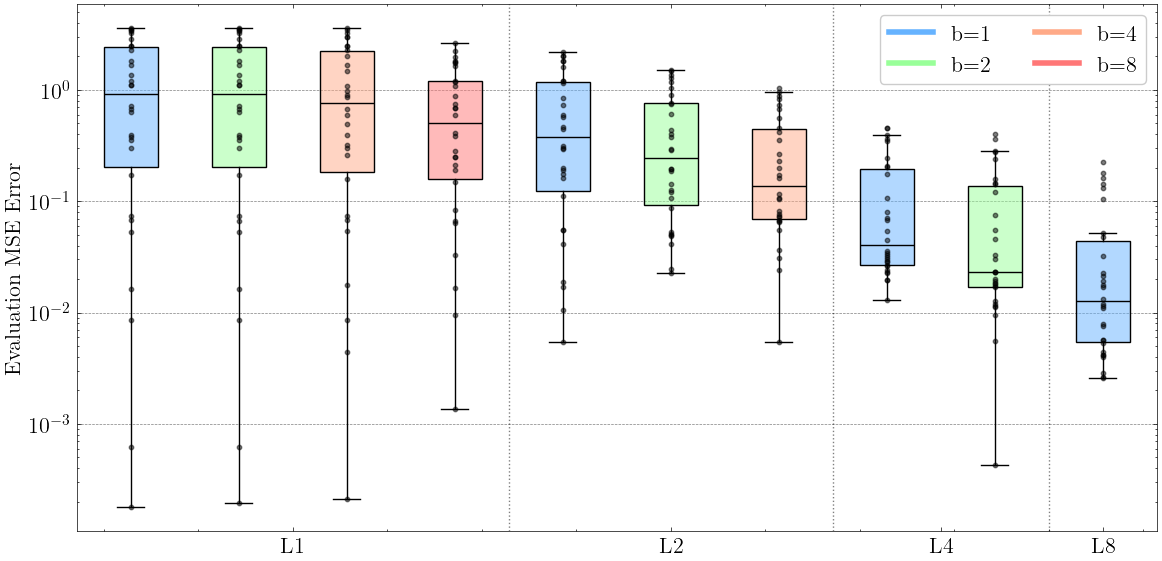

In [3]:
with open('./data/evaluation.json', 'r') as f:
    results = json.loads(f.read())
models = results.keys()

# Prepare data for boxplot
boxplot_data = []
labels = []

setups = {
    'L1': [1, 2, 4, 8],
    'L2': [1, 2, 4],
    'L4': [1, 2],
    'L8': [1]
}

for name in models:
    boxplot_data.append(results[name])

# Create the boxplot
plt.figure(figsize=(12, 6))
box = plt.boxplot(boxplot_data, patch_artist=True, notch=False, vert=True, zorder=1, showfliers=False)

# Define colors for the boxplots
colors = {
    '1': '#66B3FF',
    '2': '#99FF99', 
    '4': '#FFAA88', 
    '8': '#FF7777', 
}

boxes = box['boxes']

i = 0
for name, bs in setups.items():
    for b in bs:
        # patch.set_alpha(0.5)
        boxes[i].set_edgecolor('black')
        boxes[i].set_facecolor(colors[str(b)])  # Set color based on hyperparameter
        
        r, g, b, a = boxes[i].get_facecolor()
        boxes[i].set_facecolor((r, g, b, 0.5))
        
        data = boxplot_data[i]
        y = np.random.normal(i + 1, 0.0, size=len(data))
        plt.scatter(y, data, alpha = 0.5, color = 'black', s = 10, zorder = 2)
        i += 1
    
for median in box['medians']:
    median.set_color('black')

# Adding legend
handles = [plt.Line2D([0], [0], color=colors[str(b)], lw=4) for b in [1, 2, 4, 8]]
labels_legend = [f'b={b}' for b in [1, 2, 4, 8]]
plt.legend(handles, labels_legend, loc='upper right', ncol=2)

# Set x-ticks and labels
plt.xticks([2.5, 6, 8.5, 10], ['L1', 'L2', 'L4', 'L8'], rotation = 0)
plt.ylabel('Evaluation MSE Error')
plt.grid(False, axis='x')

plt.axvline(4.5, 0, alpha = 0.5, color = 'black', linestyle = ':')
plt.axvline(7.5, 0, alpha = 0.5, color = 'black', linestyle = ':')
plt.axvline(9.5, 0, alpha = 0.5, color = 'black', linestyle = ':')

plt.yscale('log')

# Show the plot
plt.tight_layout()
plt.savefig('./performance 1.svg')
plt.show()